<a href="https://colab.research.google.com/github/juansokil/Scripts-Tesis/blob/master/01.Construccion_BaseDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En primera instancia se deben cargar las librerias necesarias para el análisis:


In [0]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Se debe levantar el archivo. 

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/juansokil/Scripts-Tesis/master/bases_genero/scopus001.csv', encoding='latin1')
df.columns

Index(['Authors', 'Title', 'Year', 'Source title', 'Volume', 'Issue',
       'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI',
       'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'References', 'Correspondence Address', 'Editors', 'Sponsors',
       'Publisher', 'Conference name', 'Conference date',
       'Conference location', 'Conference code', 'ISSN', 'ISBN', 'CODEN',
       'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Source', 'EID'],
      dtype='object')

Esta es una opcion para iterar sobre un conjunto de archivos csv

In [0]:
path = ('./bases_genero')
files = os.listdir(path)
files
os.getcwd()

df = pd.DataFrame()
for f in files:
    print(f)
    print(1+2)
    csv = pd.read_csv(f, encoding='latin1')
    print(csv)
    df = df.append(csv)

In [0]:
#Quita duplicados
df = df.drop_duplicates(subset='EID', keep='first', inplace=False)


Identifico los países, hay dos estrategias de búsqueda

In [0]:
####SEPARA ULTIMO ESPACIO - IDENTIFICA PAIS####
df['Country'] = df['Authors with affiliations'].str.rsplit(',').str[-1] 
df['Country2'] = df['Affiliations'].str.rsplit(',').str[-1] 

In [0]:
# replace field that's finish with punctuation with nan
df['Country']=df['Country'].replace('[.]$', np.nan, regex=True)        
df['Country'] = np.where(df['Country'].isnull(), df['Country2'], df['Country'])
#df.Cat1 = df.Cat1.fillna(value=df.Cat2)

###Elimino aquellos que no tienen abstract
df = df.loc[df['Abstract'] !='[No abstract available]']

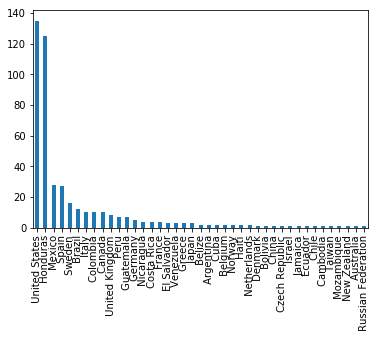

In [0]:
pd.value_counts(df['Country']).plot(kind='bar')



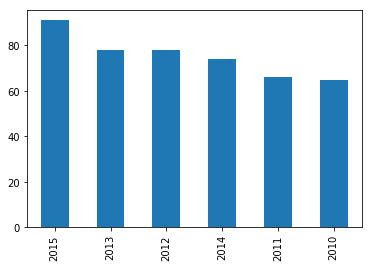

In [0]:
pd.value_counts(df['Year']).plot(kind='bar')

Arma la base final.

In [0]:
base_genero =  df[['Year','Source title','Title','Abstract','EID','Country']]
base_genero.columns = ['Año','Revista','Titulo','Resumen','id','Pais']


Por ultimo guardo la base

In [0]:
base_genero.to_csv('../base_completa/base_completa.csv',  header=True, sep='\t', encoding='latin1')